# Effects of Used Cars Maximum Power,Purchase Year, and Transmission  on Their Selling Prices
## by Gbenga Olurankinse

## Investigation Overview

In this investigation, I wanted to look at the effects of Maximum Power, Owner, Purchase Year and Transmission of used cars on their selling prices.

## Dataset Overview

The data consisted of used cars selling price, maximum power, owner, amongst others, with 7906 attributes. some not required columns were dropped for the course of this analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
used_cars = pd.read_csv('UserCarData.csv')

In [3]:
# change all columns name to lower case for consistency
used_cars.columns = used_cars.columns.str.lower()

# rename 'name','state or province' to be more descriptive
used_cars.rename(columns = {'name':'brand','state or province':'state'},inplace=True)

In [4]:
# split owner column variable and select only descriptive order (first,second,third,fourth)
used_cars['owner'] = used_cars.owner.apply(lambda x:x.split('_')[0])

In [5]:
# remove rows with Test in owner column
used_cars = used_cars.loc[used_cars['owner'] != "Test"]

# # drop columns as said above
col_drop = ['sales_id','torque','sold']
used_cars.drop(columns = col_drop, inplace=True)

In [6]:
# function to orderly categorize column observations
def ordinal_cat(colm,val, order = False):
    """
    This function takes three parameters and returns the category datatype
    col : column to convert is datatype
    val : column observations, could be a list
    order : bool, default is False
    """
    order_year = pd.api.types.CategoricalDtype(categories = val, ordered = order)
    used_cars[colm] = used_cars[colm].astype(order_year)

In [7]:
# group the year
used_cars.loc[used_cars['year'].between(1994,1999), 'purchase_year'] = '1994-1999'
used_cars.loc[used_cars['year'].between(2000,2009), 'purchase_year'] = '2000-2009'
used_cars.loc[used_cars['year'].between(2010,2019), 'purchase_year'] = '2010-2019'
used_cars.loc[used_cars['year']==2020, 'purchase_year'] = '2020'

In [8]:
# ordered lists 
year_list = ['1994-1999', '2000-2009', '2010-2019', '2020']
seats_list = [2, 4, 5, 6, 7, 8, 9, 10, 14]
owner_list = ['First', 'Second', 'Third', 'Fourth']

# non ordered lists
brand_list = list(used_cars.brand.unique())
region_list = list(used_cars.region.unique())
state_list = list(used_cars.state.unique())
fuel_list = list(used_cars.fuel.unique())
seller_list = list(used_cars.seller_type.unique())
trans_list = list(used_cars.transmission.unique())
city_list = list(used_cars.city.unique())

In [9]:
# 2D array ordered lists with respect to col1 list order
col1_list = ['purchase_year', 'seats', 'owner']
ordered_list = [year_list, seats_list, owner_list]

# non ordered lists with respect to the col2_list order
unordered_list = [brand_list, region_list, state_list, fuel_list, seller_list, trans_list, city_list]
col2_list = ['brand', 'region', 'state', 'fuel', 'seller_type', 'transmission', 'city']

In [10]:
# loop to convert ordered lists to ordinal categorical variable
for col1 in range(len(col1_list)):
    ordinal_cat(col1_list[col1], ordered_list[col1], order=True)
    
#loop to  convert unordered lists to nominal categorical variable    
for col2 in range(len(col2_list)):
    ordinal_cat(col2_list[col2], unordered_list[col2])

## Distribution of Used Car Selling Prices
Used Cars selling prices in the dataset take on a very large range of values, from minimum of about  30,000 to 10,000,000 USD at the highest. Plotted on a logarithmic scale, the distribution of used cars selling prices takes on a unimoda shape with a spike around 650,000 USD

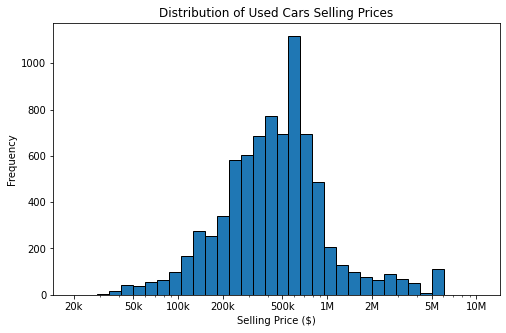

In [11]:
# the above plot is right skewed with long tail, lets plot on log scale instead
bin_size = 0.08
log_price_max = np.log10(used_cars['selling_price']).max()
bins = 10 ** np.arange(4.3, log_price_max + bin_size, bin_size)

plt.figure(figsize=[8,5])
plt.hist(data=used_cars, x='selling_price', bins=bins, edgecolor='black')
plt.xscale('log')
plt.xticks([2e4, 5e4, 1e5, 2e5, 5e5, 1e6, 2e6, 5e6, 1e7], ['20k','50k','100k','200k','500k','1M', '2M','5M','10M'])
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Used Cars Selling Prices')
plt.show()

## Selling Prices vs Maximum Engine of the used cars
Plotting the selling price on a log scale against the standard scale of the maximum power of the used cars, produces a strong positive relationship. As the maximum power increases, the selling price increases.

In [12]:
# log tansformation function for selling price
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

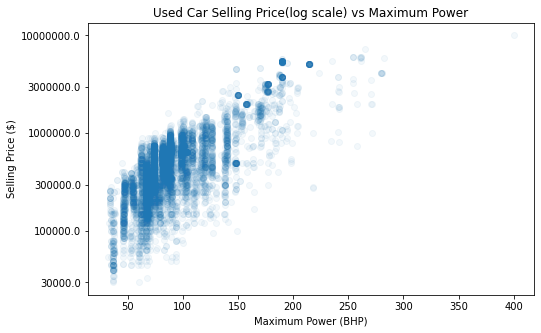

In [13]:
plt.figure(figsize=[8,5])
sb.regplot(data=used_cars, x='max_power', y = used_cars['selling_price'].apply(log_trans),
           x_jitter=0.4, scatter_kws={"alpha":1/20}, fit_reg=False);
plt.title('Used Car Selling Price(log scale) vs Maximum Power')
tick_locs = [3e4,1e5,3e5,1e6,3e6,1e7]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.ylabel('Selling Price ($)')
plt.xlabel('Maximum Power (BHP)');

## Selling Price of Used Cars vs Purchase Year
plotting the selling price on a log scale against the year the used cars were purchase shows a positive relationship. As the year becoming recent from 1994-1999 to 2020, the cost of the used cars increases. no significant increment between year 2010-2019 and 2020 due to limited datapoints of used cars in 2020.



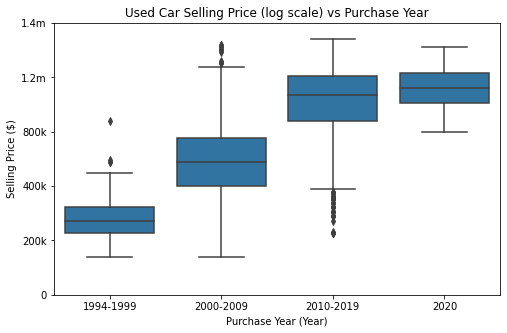

In [14]:
# sorting for selling_price less than or equal to $1,200,000 
price_sorted = used_cars[used_cars['selling_price'] <= 12e5]

base_color = sb.color_palette()[0]
sb.boxplot(data= price_sorted, x='purchase_year', y=used_cars['selling_price'].apply(log_trans), color=base_color);
plt.yticks([4.2, 4.6, 5.0, 5.4, 5.8, 6.2],['0','200k','400k','800k','1.2m','1.4m'])
plt.title('Used Car Selling Price (log scale) vs Purchase Year')
plt.ylabel('Selling Price ($)')
plt.xlabel('Purchase Year (Year)');
plt.gcf().set_size_inches(8, 5)

## What is the relationship between Selling Price of Used Cars vs Transmission
plotting selling price against transmission of the used cars denote that Automatic used cars are more expensive than manual used cars.

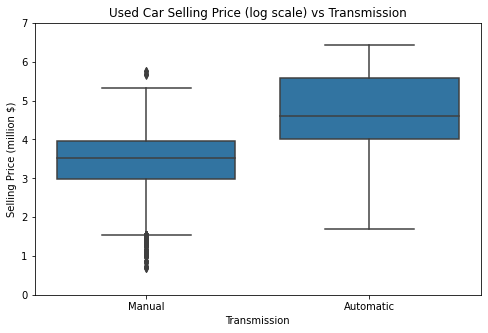

In [15]:
# sorting for selling_price less than or equal to $6,000,000 
price_sorted = used_cars[used_cars['selling_price'] <= 6e6]

base_color = sb.color_palette()[0]
sb.boxplot(data= price_sorted, x='transmission', y=used_cars['selling_price'].apply(log_trans), color=base_color);
plt.yticks([4.2, 4.6, 5.0, 5.4, 5.8, 6.2, 6.6, 7],[0, 1, 2, 3,4 ,5, 6, 7])
plt.title('Used Car Selling Price (log scale) vs Transmission')
plt.ylabel('Selling Price (million $)')
plt.xlabel('Transmission');
plt.gcf().set_size_inches(8, 5)

## Selling Price of Used Cars and Maximum Power Across Purchase Year 
It is observed that the relationship of selling price and maximum power gets positively stronger acorss the year from 1994 to 2020. At 50 BPH, the highest selling price of cars in year between 1994-1999 is about 100,000 USD while cars with the same maximum power in 2009-2009 is around 200,000 USD. In 2010-2019, cars with same maximum power highest cost is around 500,000 USD. this proves that purchase year of a car with maximum power can be used to predict the selling price of a used car.

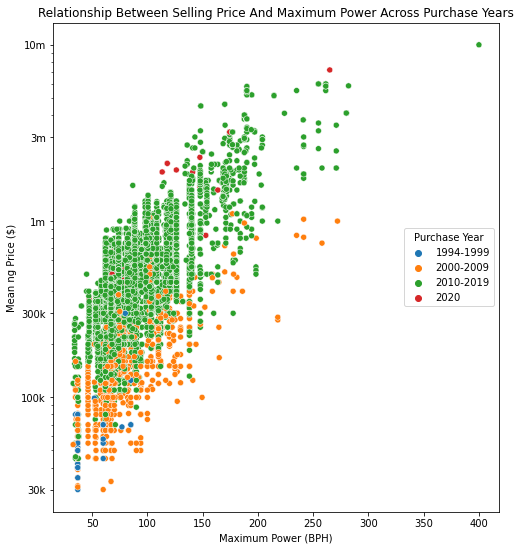

In [16]:
plt.figure(figsize=[8,9])
sb.scatterplot(data = used_cars, x = 'max_power', y = 'selling_price', hue = 'purchase_year')
plt.yscale('log')
plt.yticks([3e4, 1e5, 3e5, 1e6, 3e6, 1e7],['30k','100k','300k', '1m','3m','10m'])
plt.title('Relationship Between Selling Price And Maximum Power Across Purchase Years')
plt.xlabel('Maximum Power (BPH)')
plt.ylabel('Mean ng Price ($)')
plt.legend(loc = 7, title='Purchase Year');

## Selling Price of Used Cars and Purchase Year Across Transmission
Looking at the plot of effect of used cars transmission on selling price and purchase year, The average selling price of automatic cars across the year is always higher than the average selling price of manual used cars.

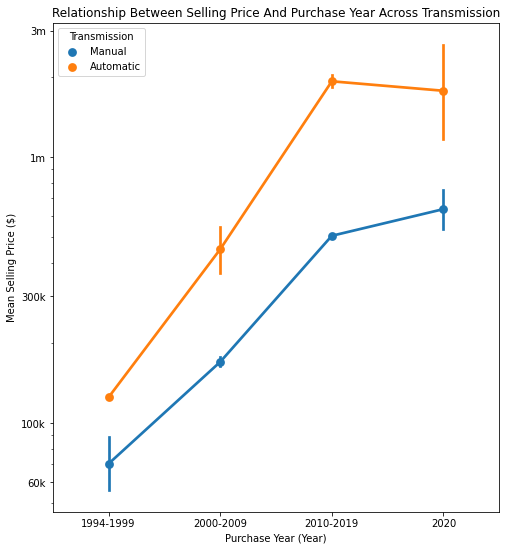

In [17]:
plt.figure(figsize=[8,9])
sb.pointplot(data = used_cars, x = 'purchase_year', y = 'selling_price', hue = 'transmission')
plt.yscale('log')
plt.yticks([6e4, 1e5, 3e5, 1e6, 3e6],['60k', '100k', '300k', '1m', '3m'])
plt.title('Relationship Between Selling Price And Purchase Year Across Transmission')
plt.xlabel('Purchase Year (Year)')
plt.ylabel('Mean Selling Price ($)')
plt.legend(loc = 2, title='Transmission');

In [ ]:
!jupyter nbconvert Project_Used_Cars_Part_2.ipynb --to slides --post serve --no-input --no-prompt